In [5]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, x_params, r):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    a, b, Km, n = x_params
    x, y, z = yz
    return np.array([a*x**n/(Km+x**n)-b*x, x - y, (x / y - z) / r + z/(5+z)])

# Time points we want for the solution
t = np.linspace(0, 10, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 1.0])

# Parameters
Fs = [10.0, 4.0, 2.0]
b =  0.5
r = 2

# Keeping Track of the final values:
xs = []
ys = []
zs = []

for F in Fs:
    # Integrate ODES
    x_params = [F, b, 5, 4]
    xyz = integrate.odeint(rhs, xyz_0, t, args=(x_params, r))

    # Pluck out y and z
    x, y, z = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)
    z = np.insert(z, 0, 1.0)
    xs.append(x)
    ys.append(y)
    zs.append(z)
t = np.insert(t, 0, -1.0)

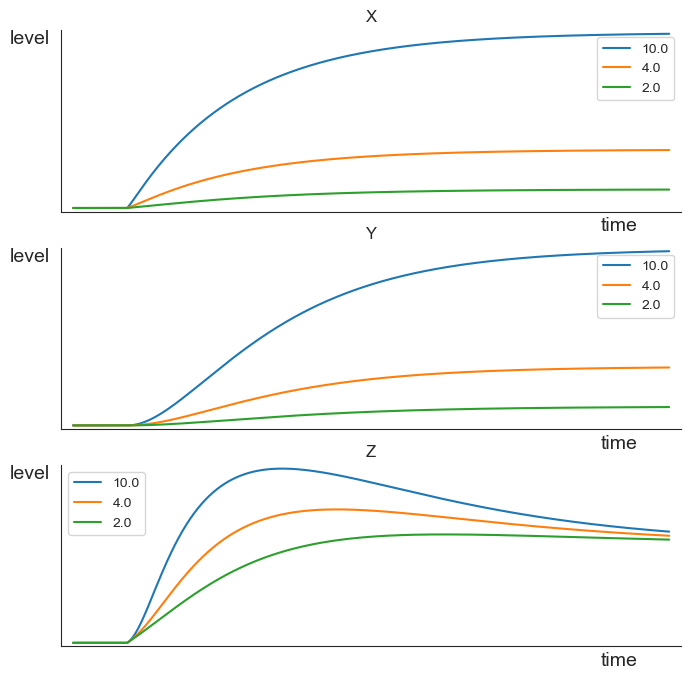

In [6]:
# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
for y in ys:
    ax[1].set_title('Y')
    ax[1].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z in zs:
    ax[2].set_title('Z')
    ax[2].plot(t, z, '-')
for i in range(ax.size):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].set_ylabel('level', rotation=0, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

In [1]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, a, b, r1, r2):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    x, y, z1, z2= yz
    return np.array([a * x / (1 + x) - b * x, 
                     x - y, 
                     (x / y - z1) / r1 + z1 / (1 + z1) * 2 / (2 + z2), 
                     (x / y - z2) / r2 + z2 / (1 + z2) * 0.5/ (0.5 + z1)])

# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xyz_0 = np.array([2.0, 1.0, 0.0, 0.0])

# Parameters
Fs = [10.0, 4.0, 1.0]
b =  0.5
r1 = 0.1
r2 = 2.0

# Keeping Track of the final values:
xs = []
ys = []
z1s = []
z2s = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, r1, r2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 0.0)
    z1 = np.insert(z1, 0, 0.0)
    z2 = np.insert(z2, 0, 0.0)
    xs.append(x)
    ys.append(y)
    z1s.append(z1)
    z2s.append(z2)
t = np.insert(t, 0, -1.0)


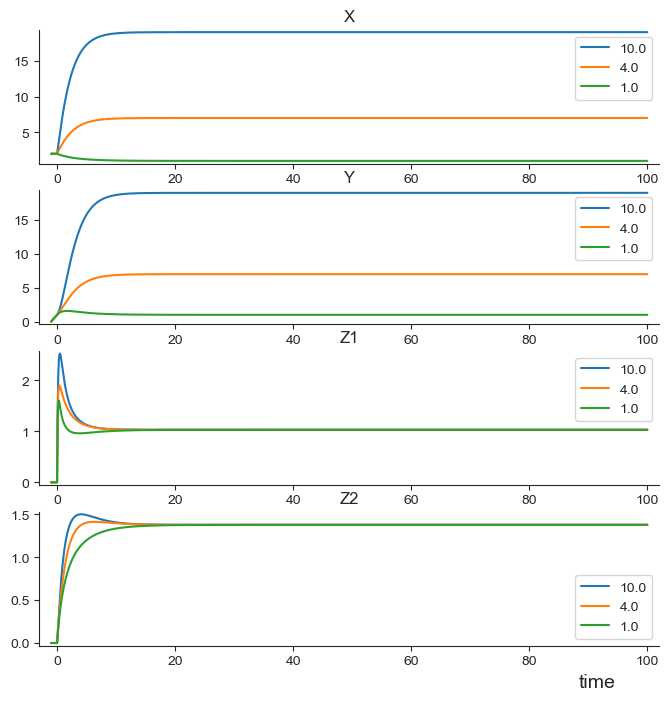

In [2]:
# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(4, 1, figsize=(8, 8))
for y in ys:
    ax[1].set_title('Y')
    ax[1].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z1 in z1s:
    ax[2].set_title('Z1')
    ax[2].plot(t, z1, '-')
for z2 in z2s:
    ax[3].set_title('Z2')
    ax[3].plot(t, z2, '-')
for i in range(ax.size):
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

In [1]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

r1=np.arange(0.00001,2,100)
r2=np.arange(0.00001,2,100)

def calc(R1,R2):
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)

    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 1.0, 1.0])

    # Parameters
    Fs = 10.0
    b =  0.5

    # Keeping Track of the final values:
    xs = []
    ys = []
    z1s = []
    z2s = []

    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, R1, R2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)
    z1 = np.insert(z1, 0, 1.0)
    z2 = np.insert(z2, 0, 1.0)
    xs.append(x)
    ys.append(y)
    z1s.append(z1)
    z2s.append(z2)
    t = np.insert(t, 0, -1.0)
    return z1[-1],z2[-1]
r1=np.linspace(0.00001,2,100)
r2=np.linspace(0.00001,2,100)
z1x=np.array([])
z2y=np.array([])

for R1 in r1:
    for R2 in r2:
        z1x=np.append(z1x,calc(R1,R2)[0])
        z2y=np.append(z2y,calc(R1,R2)[1])

X, Y = np.meshgrid(z1x,z2y)
Z=(X-Y)
Z[Z<-1] = -1
Z[Z>1] = 1

fig, axs = plt.subplots(1, 1, layout='constrained')
pc = axs.imshow(Z, origin='lower', cmap='RdBu_r')
axs.set_xticks([0, 250, 500, 750, 1000], labels=[0, 0.5, 1, 1.5, 2])
axs.set_yticks([0, 250, 500, 750, 1000], labels=[0, 0.5, 1, 1.5, 2])
fig.colorbar(pc)
axs.set_title('SS Behavior of I1-FFL')


NameError: name 'rhs' is not defined

In [16]:
"""

A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:

"""

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

sns.set_style('ticks')
%matplotlib inline

def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21, r1, r2):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    
    x, y, z1, z2= xyz
    return np.array([a * hill_act(x, KMx, nx)-b * x, 
                     c * x - d * y, 
                     (x / y - z1) / r1 + e * hill_act(z1, KM11, n11) * hill_inh(z2, KM21, n12), 
                     (x / y - z2) / r2 + f * hill_act(z2, KM22, n22) * hill_inh(z1, KM22, n21)])

r1=np.linspace(0.00001,2,100)
r2=np.linspace(0.00001,2,100)

def calc(P, R1, R2):
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)

    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 1.0, 1.0])

    # Parameters
    Fs = 10.0
    #b, c, d, e, f, KM11, KM12, KM21, KM22, KMx = P.values()
    params = np.random.rand(18)
    a, b, c, d, e, f, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21, r1, r2 = params
    

    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21, r1, r2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)

    z1 = np.insert(z1, 0, 1.0)
    z2 = np.insert(z2, 0, 1.0)

    t = np.insert(t, 0, -1.0)
    return z1[-1], z2[-1], params

z1x=np.array([])
z2y=np.array([]) 

P = {'b':0.5, 'c':1, 'd':1, 'e':1, 'f':1, 'KM11':1, 'KM12':5, 'KM21':5, 'KM22':5, 'KMx':1}

# for R1 in X:
#     for R2 in Y:
#         values = calc(P, R1,R2)
#         z1x=np.append(z1x,values[0])
#         z2y=np.append(z2y,values[1])

X, Y = np.meshgrid(r1,r2)
Z1 = np.zeros(X.shape)
Z2 = np.zeros(Y.shape)
for R1 in X:
    for R2 in Y:
        values = calc(P, R1,R2)
        Z1[R1, R2]=np.append(z1x,values[0])
        z2y=np.append(z2y,values[1])

Z1, Z2, _ = calc(P, X, Y)
Z=(Z1-Z2)
Z[Z<-1] = -1
Z[Z>1] = 1

 

fig, axs = plt.subplots(1, 1, layout='constrained')
pc = axs.imshow(Z, origin='lower', cmap='RdBu_r')
axs.set_xticks([0, 2500, 5000, 7500, 10000], labels=[0, 0.5, 1, 1.5, 2])
axs.set_yticks([0, 2500, 5000, 7500, 10000], labels=[0, 0.5, 1, 1.5, 2])
fig.colorbar(pc)
axs.set_title('SS Behavior of I1-FFL')


[[1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]
 [1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]
 [1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]
 ...
 [1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]
 [1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]
 [1.00000000e-05 2.02119192e-02 4.04138384e-02 ... 1.95959616e+00
  1.97979808e+00 2.00000000e+00]] [[1.00000000e-05 1.00000000e-05 1.00000000e-05 ... 1.00000000e-05
  1.00000000e-05 1.00000000e-05]
 [2.02119192e-02 2.02119192e-02 2.02119192e-02 ... 2.02119192e-02
  2.02119192e-02 2.02119192e-02]
 [4.04138384e-02 4.04138384e-02 4.04138384e-02 ... 4.04138384e-02
  4.04138384e-02 4.04138384e-02]
 ...
 [1.95959616e+00 1.95959616e+00 1.95959616e+00 ... 1.95959616e+00
  1.95959616e+00 1.95959616e+00]

TypeError: 'numpy.float64' object does not support item assignment

In [2]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

sns.set_style('ticks')
%matplotlib inline

def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21, r1, r2):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    
    x, y, z1, z2= xyz
    return np.array([a * hill_act(x, KMx, nx)-b * x, 
                     c * x - d * y, 
                     (x / y - z1) / r1 + e * hill_act(z1, KM11, n11) * hill_inh(z2, KM21, n12), 
                     (x / y - z2) / r2 + f * hill_act(z2, KM22, n22) * hill_inh(z1, KM22, n21)])

r1=np.arange(0.00001,2,100)
r2=np.arange(0.00001,2,100)

def psa():
    """
    Brute Force Monte Carlo Parameter Sensitivity Analysis
    """
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)

    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 1.0, 1.0])

    # Parameters
    #b, c, d, e, f, KM11, KM12, KM21, KM22, KMx = P.values()
    params = np.random.rand(13)
    hill_coefficients = np.random.randint(0, 8, size=5)
    a, b, c, d, e, f, r1, r2, KM11, KM12, KM21, KM22, KMx = params
    nx, n11, n12, n22, n21 = hill_coefficients
    
    # Keeping Track of the final values:
    xs = []
    ys = []
    z1s = []
    z2s = []

    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21, r1, r2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)

    z1 = np.insert(z1, 0, 1.0)
    z2 = np.insert(z2, 0, 1.0)

    xs.append(x)
    ys.append(y)

    z1s.append(z1)
    z2s.append(z2)
        
    t = np.insert(t, 0, -1.0)
    params = np.hstack([params, hill_coefficients])
    params = np.append(params, z1[-1])
    params = np.append(params, z2[-1])
    return params

n_trials = 10000
prm_sens_analysis = np.zeros((n_trials, 20))
for i in range(n_trials):
    prm_sens_analysis[i, :] = psa()
    
np.savetxt('FFL_PSA.csv', prm_sens_analysis, delimiter=',')

In [48]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
The same thing as above but with 2 nested FFLs instead.
"""

sns.set_style('ticks')
%matplotlib inline

def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, r1, r2, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    
    x, y1, y2, z1, z2= xyz
    return np.array([a * hill_act(x, KMx, nx)-b * x, 
                     c * x - d * y1,
                     e * x - f * y2,
                     (x / y1 - z1) / r1 + g * hill_act(z1, KM11, n11) * hill_inh(z2, KM21, n12), 
                     (x / y2 - z2) / r2 + h * hill_act(z2, KM22, n22) * hill_inh(z1, KM22, n21)])


def psa():
    """
    Brute Force Monte Carlo Parameter Sensitivity Analysis
    """
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)

    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 2.0, 1.0, 1.0])

    # Parameters
    #b, c, d, e, f, KM11, KM12, KM21, KM22, KMx = P.values()
    params = np.random.rand(15)
    hill_coefficients = np.random.randint(0, 8, size=5)
    a, b, c, d, e, f, g, h, r1, r2, KM11, KM12, KM21, KM22, KMx = params
    nx, n11, n12, n22, n21 = hill_coefficients
    
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, g, h, r1, r2, KM11, KM12, KM21, KM22, KMx, nx, n11, n12, n22, n21))

    # Pluck out y and z
    x, y1, y2, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y1 = np.insert(y1, 0, 2.0)
    y2 = np.insert(y2, 0, 2.0)

    z1 = np.insert(z1, 0, 1.0)
    z2 = np.insert(z2, 0, 1.0)
        
    t = np.insert(t, 0, -1.0)
    params = np.hstack([params, hill_coefficients])
    params = np.append(params, z1[-1])
    params = np.append(params, z2[-1])
    return params

n_trials = 10000
prm_sens_analysis = np.zeros((n_trials, 22))
for i in range(n_trials):
    prm_sens_analysis[i, :] = psa()
    
np.savetxt('FFL_PSA_v2.csv', prm_sens_analysis, delimiter=',')

Z1 = 15.887347110188713
Z1 = 8.706363771023327
Z1 = 7.3787057946785986
Z2 = 2.740886029375391
Z2 = 10.443580599519096
Z2 = 11.092903354448381


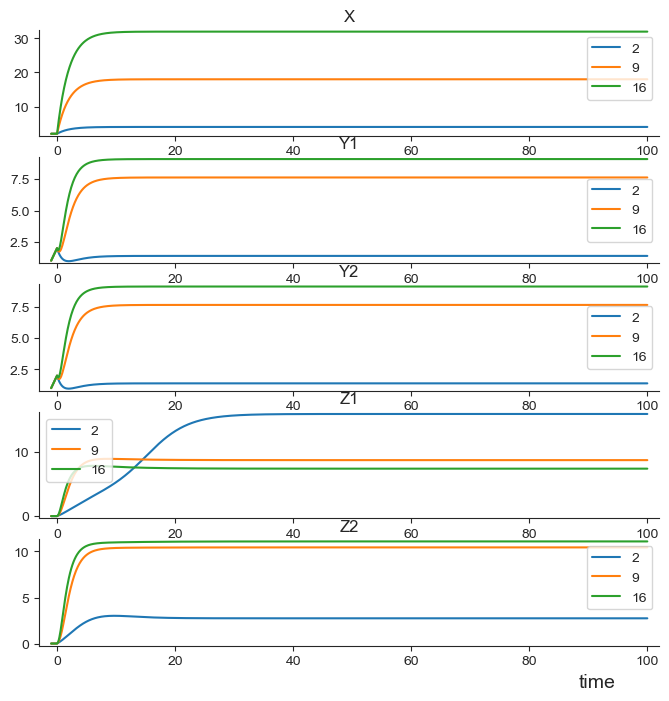

In [143]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
The same thing as above but with 2 nested FFLs instead.
"""

sns.set_style('ticks')
%matplotlib inline

# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 2.0, 0.0, 0.0])

# Parameters
b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, 1.0, 10.0, 1.0, 10.0, 10.0, 0.5, 10.0, 10.0, 0.5]
nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 2.5, 10.0, 10.0]


# Keeping Track of the final values:
xs = []
y1s = []
y2s = []
z1s = []
z2s = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    # Pluck out y and z
    x, y1, y2, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y1 = np.insert(y1, 0, 1.0)
    y2 = np.insert(y2, 0, 1.0)
    z1 = np.insert(z1, 0, 0.0)
    z2 = np.insert(z2, 0, 0.0)
    xs.append(x)
    y1s.append(y1)
    y2s.append(y2)
    z1s.append(z1)
    z2s.append(z2)
t = np.insert(t, 0, -1.0)

# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 8))
for y in y1s:
    ax[1].set_title('Y1')
    ax[1].plot(t, y, '-')
for y in y2s:
    ax[2].set_title('Y2')
    ax[2].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z1 in z1s:
    ax[3].set_title('Z1')
    ax[3].plot(t, z1, '-')
    print(f'Z1 = {z1[-1]}')
for z2 in z2s:
    ax[4].set_title('Z2')
    ax[4].plot(t, z2, '-')
    print(f'Z2 = {z2[-1]}')
for i in range(ax.size):
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

In [141]:
# import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)
    
    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

def calc(a, r2):
    """
    Brute Force Monte Carlo Parameter Sensitivity Analysis
    """
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)
   
    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 2.0, 0.0, 0.0])

    # Parameters
    b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, 1.0, 10.0, 1.0, 10.0, 10.0, 0.5, 10.0, 10.0, 0.5]
    nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 2.5, 10.0, 10.0]


    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    x, y1, y2, z1, z2 = xyz.transpose()
    return z1[-1], z2[-1]

y1array=np.linspace(0.1,20,100)
y2array=np.linspace(0.1,20,100)
z1xarray=np.empty((100,100))
z2yarray=np.empty((100,100))

for i,R1 in enumerate(y1array):
    for j,R2 in enumerate(y2array):
        values = calc(a=R1, r2=R2)
        z1xarray[i,j]=values[0]
        z2yarray[i,j]=values[1]

Z=z1xarray-z2yarray
# Z[Z<-1] = -1
# Z[Z>1] = 1

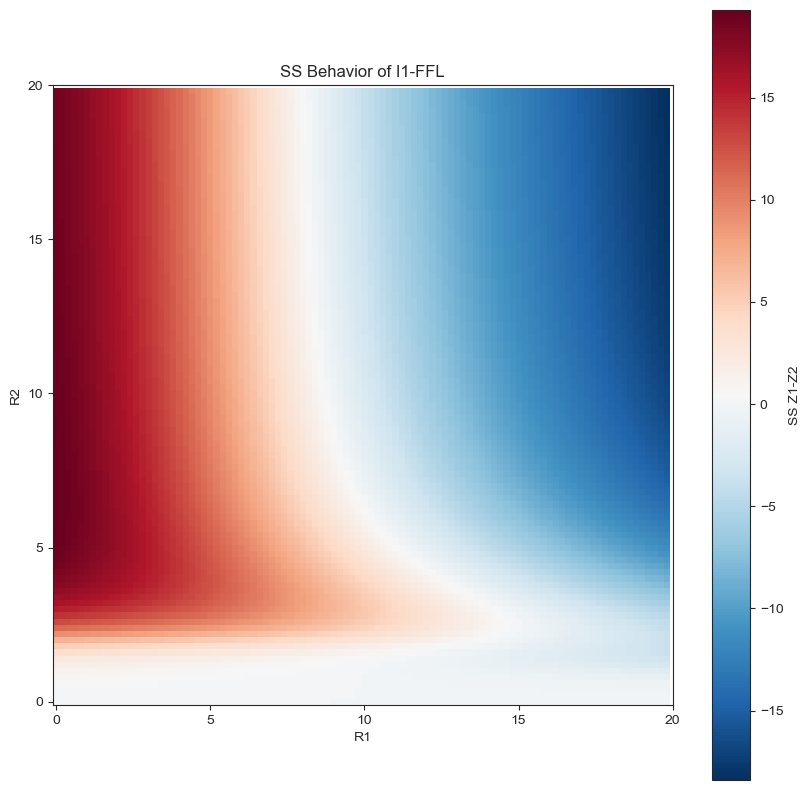

In [144]:
x_ticks = [0, 5, 10, 15, 20]
y_ticks = [0, 0.25, 0.5, 0.75, 1.0]
fig, axs = plt.subplots(figsize=(10, 10))
pc = axs.imshow(Z, origin='lower', cmap='RdBu_r')#, vmin=-5, vmax=5)
axs.set_xticks([0, 25, 50, 75, 100], labels=x_ticks)
axs.set_yticks([0, 25, 50, 75, 100], labels=x_ticks)
axs.set_xlabel('R1')
axs.set_ylabel('R2')
cbar = fig.colorbar(pc)
cbar.set_label('SS Z1-Z2')
axs.set_title(f'SS Behavior of I1-FFL')
plt.show()

In [146]:
import numpy as np
from scipy.integrate import solve_ivp

def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)
    
    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

# Define parameter values
params = {
    'a': 10.0, 'b': 1.0, 'c': 10.0, 'd': 1.0, 'e': 10.0, 'f': 1.0, 'g': 10.0, 'h': 10.0, 'i': 0.5, 'j': 10.0,
    'k': 10.0, 'l': 0.5, 'KMxy1': 10.0, 'KMxy2': 10.0, 'KM11': 10.0, 'KM12': 1.0, 'KM1x': 10.0, 'KM1y': 5.0, 
    'KM22': 10.0, 'KM21': 1.0, 'KM2x': 10.0, 'KM2y': 5.0, 'nx': 2, 'n11': 2, 'n12': 2, 'n1x': 2, 'n1y': 2, 
    'n22': 2, 'n21': 2, 'n2x': 2, 'n2y': 2
}
# Initial conditions
initial_conditions = [0.0, 0.0, 0.0, 0.0, 0.0]

# Time points for integration
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Integrate the ODEs
solution = solve_ivp(lambda t, y: rhs(y, t, **params), t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for z1 and z2
z1_solution = solution.y[3]
z2_solution = solution.y[4]

# Perform sensitivity analysis using finite differences
sensitivity_eps = 1e-6
sensitivity_matrix = np.zeros((len(z1_solution), len(params)))

for i, param_name in enumerate(params):
    perturbed_params = params.copy()
    perturbed_params[param_name] += sensitivity_eps

    perturbed_solution = solve_ivp(lambda t, y: rhs(y, t, **perturbed_params), t_span, initial_conditions, t_eval=t_eval)
    perturbed_z1_solution = perturbed_solution.y[3]
    perturbed_z2_solution = perturbed_solution.y[4]

    sensitivity_matrix[:, i] = ((perturbed_z1_solution - z1_solution) + (perturbed_z2_solution - z2_solution)) / (2 * sensitivity_eps)

# Print or analyze the sensitivity results
print("Sensitivity Matrix:")
print(np.unravel_index(np.argmax(sensitivity_matrix), sensitivity_matrix.shape))
ordered_keys = np.argsort(sensitivity_matrix[-1,:])
print(ordered_keys)

Sensitivity Matrix:
(99, 3)
[ 8 11 16 20  2  4  1 28 24 27 23 18 14 29 25  7 10  0 26 30 22 19 15 13
 12  9  6 17 21  5  3]


<Figure size 640x480 with 0 Axes>

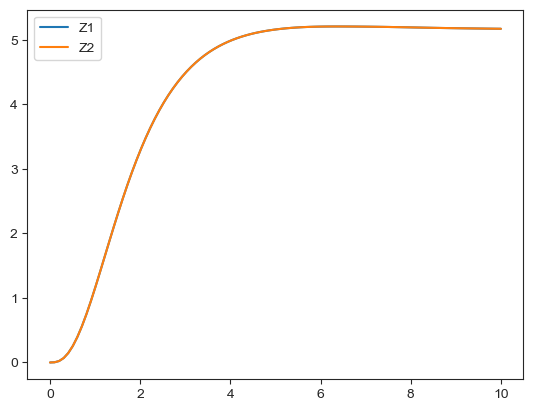

<Figure size 640x480 with 0 Axes>

In [147]:
plt.plot(t_eval, z1_solution)
plt.plot(t_eval, z2_solution)
plt.legend(['Z1', 'Z2'])
plt.figure()
# for i, param_name in enumerate(params):
#     plt.plot(t_eval, sensitivity_matrix[:,0])
# plt.legend(params.keys())

In [118]:
params = {
    'a': 10.0, 'b': 1.0, 'c': 10.0, 'd': 1.0, 'e': 10.0, 'f': 1.0, 'g': 10.0, 'h': 0.5, 'i': 10.0, 'j': 10.0,
    'k': 0.5, 'l': 10.0, 'KMxy1': 10.0, 'KMxy2': 10.0, 'KM11': 1.0, 'KM12': 0.5, 'KM1x': 10.0, 'KM1y': 5.0, 
    'KM22': 10.0, 'KM21': 1.0, 'KM2x': 10.0, 'KM2y': 5.0, 'nx': 2, 'n11': 2, 'n12': 2, 'n1x': 2, 'n1y': 2, 
    'n22': 2, 'n21': 2, 'n2x': 2, 'n2y': 2
}

reference = {i: key for i, key in enumerate(params)}

print("New Dictionary:")
for key in ordered_keys:
    print(reference[key])

New Dictionary:
l
i
KM2x
KM1x
e
c
n12
b
n21
n22
n1x
KM11
KM22
n2x
n11
k
a
h
n1y
n2y
nx
KM21
KMxy1
g
KMxy2
j
KM12
KM1y
KM2y
d
f
